# Logistic Regression

This statistical method is used for binary classification tasks (despite the name!), in addition to the perceptron. The main difference for logistic regression is that the data is not easily separable. As such, instead of predicting whether or not an input belongs to one category or the other, we predict the probability that the instance belongs to a particular category. 

<p align="center">
    <img src="logistic regression.jpg" width="500">
</p>

Logistic regression uses the Sigmoid Function to map the inputs to a value between 0 and 1. This is how it looks like: 

$\sigma(z) = \frac{1}{1 + e^{-z}}$

z is the linear combination of the inputs and weights. So, $z= w_1x_1 + w_2x_2+....w_nx_n + b$. The sigmoid function predicts a probability, denoted $\hat{y}$. 

In order to train te model, we define a cost function. Commonly, we use the Binary Cross Entropy Function: 

$J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} (y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i))$

In order to minimize this cost value, we use gradient descent again! This means updating each instance with a learning rate, $\alpha$:

$\theta_j = \theta_j - \alpha\frac{d}{d\theta_j}J(\theta)$

There also exists multinomial and ordinal logistic regresison types, but we focus on binary classification for our single-neuron model.





# Application

[heart attack dataset here](https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility)

In this notebook, we will be predicting if someone will get a heart attack based on two factors: age and maximum heart rate. You will notice that the correlation between these two factors is a bit weak, but we will continue for the sake of experiment.

This is how our Bernoulli function looks like:

\[$
    P(y= 1 | x) = \begin{cases}
    yhat & \text{if }  y =1 \\
    1-yhat  & \text{if } y = 0 
\end{cases}$
\]



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\diabetes_012_health_indicators_BRFSS2015.csv")

live = df[df.Diabetes_012 == 0]
die = df[df.Diabetes_012 == 2]
df= df.dropna()


Let's visualize our data! We will also compress it such that if one gets a heart attack, they are assigned the value 1, and if not, they ae assigned the value 0.

Length of live.thalach: 213703
Length of die.thalach: 35346


Text(0.5, 1.0, 'Simplified Data')

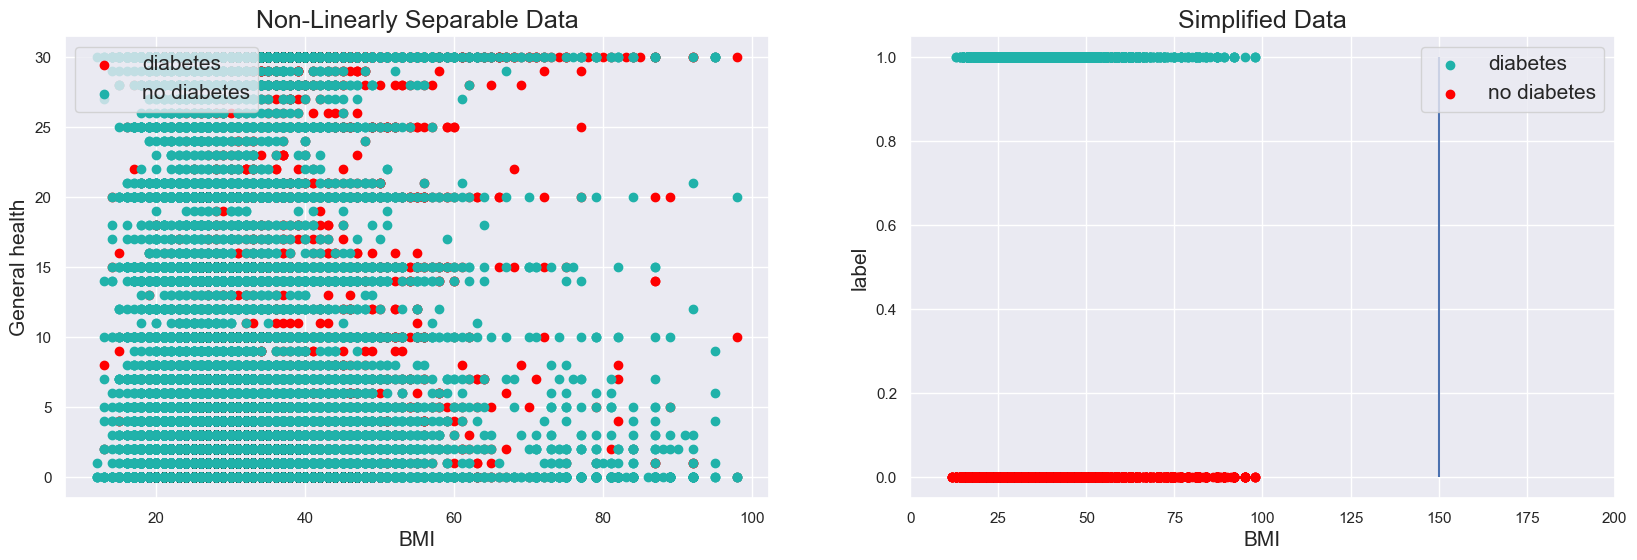

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))


ax1.scatter(die.BMI, 
            die.PhysHlth, 
            color = "red", 
            label = "diabetes")
ax1.scatter(live.BMI, 
            live.PhysHlth, 
            color = "lightseagreen", 
            label = "no diabetes")
ax1.set_xlabel("BMI", fontsize = 15)
ax1.set_ylabel("General health", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)

print("Length of live.thalach:", len(live.BMI))
print("Length of die.thalach:", len(die.BMI))


ax2.set_xlim((0, 200))
ax2.scatter(die.BMI, 
            np.ones(35346), 
            color = "lightseagreen", 
            label = "diabetes")
ax2.scatter(live.BMI, 
            np.zeros(213703), 
            color = "red", 
            label = "no diabetes")
ax2.vlines(150, 0.0, 1)
ax2.set_xlabel("BMI", fontsize = 15)
ax2.set_ylabel("label", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper right")
ax2.set_title("Simplified Data", fontsize = 18)


This is BARELY linear. There is so much overlap that using the Perceptron would be pretty much impossible. However, we notice that a correlation does exist, though small, does exist, and we can use logistic regression to predict probabilities. live= 1, die= 0. 

Next, we define our main functions: the sigmoid function and the binary cross entropy loss function.

In [4]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

Then, we train the model. We import our SingleNeuron class!

In [5]:
from sklearn.model_selection import train_test_split
import single_neuron as node

In [7]:
X = df.iloc[:, [4]].values #iloc to choose training data
X = X.reshape(-1, 1)
y = np.where(df.Diabetes_012 == 2, 0, 1) #IS IT 0, 1 OR 1, 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = node.SingleNeuron(sigmoid, cross_entropy_loss)

model.train(X_train, y_train, alpha = 0.001, epochs = 1000)


ValueError: Found input variables with inconsistent numbers of samples: [200, 253680]

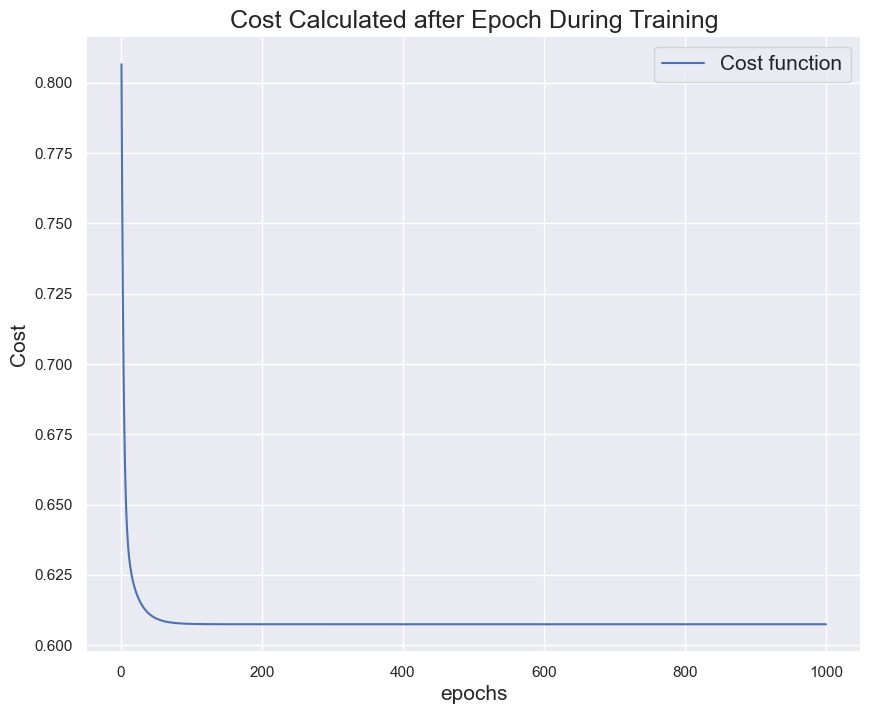

In [ ]:
model.plot_cost_function()


---

This looks good! Visualizing the cost function over the epochs during training helps us verify that are neuron is indeed learning over time. We can next visualize our hypthesis function, or prediction function (recall in all supervised machine learning we are learning a function $h$ which approximates the true target function $f$), by plotting the ```SingleNeuron.predict()``` method over the scattered data points in question. This can be done by running the following code in the cell below.


---

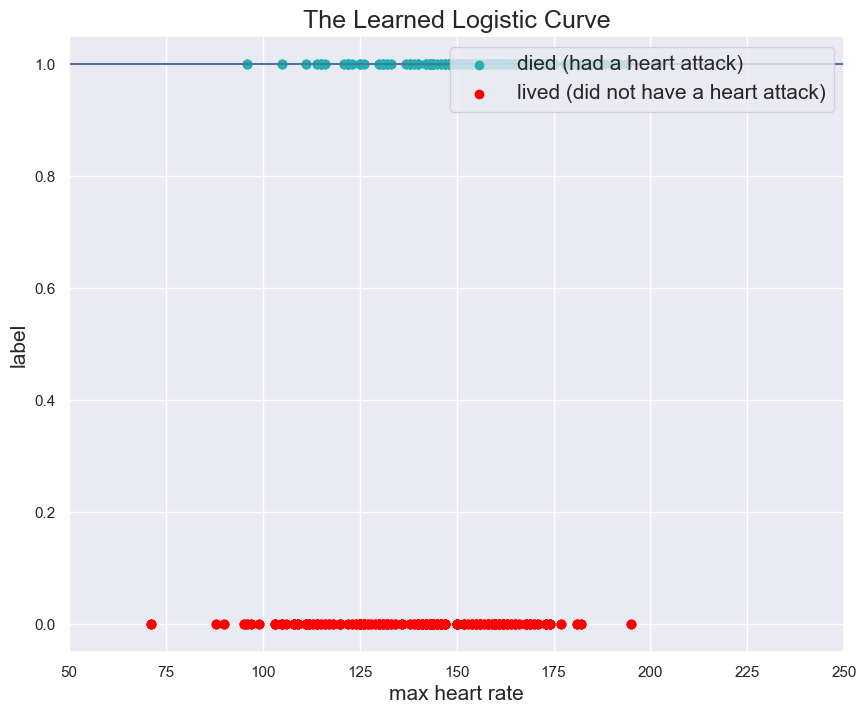

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlim((50,250 ))
plt.scatter(die.thalach, 
            np.ones(526), 
            color = "lightseagreen", 
            label = "died (had a heart attack)")
plt.scatter(live.thalach, 
            np.zeros(499), 
            color = "red", 
            label = "lived (did not have a heart attack)")

domain = np.linspace(50, 250, 100)
plt.plot(domain, model.predict(domain.reshape(-1, 1)))
plt.xlabel("max heart rate", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper right")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

What is this? We see that the Sigmoid function does not map well to this dataset! Let's see why by printing the predictions

In [ ]:
model.predict(X)

array([0.33205945, 0.75887916, 0.75887916, ..., 0.75887916, 0.33205945,
       0.33205945])

Next we calculate the error.

In [ ]:
np.rint(model.predict(X)) != y

array([ True, False, False, ..., False, False,  True])

In [ ]:
classification_error = (np.rint(model.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.288780487804878


Not bad! We then visualize the decision boundary.

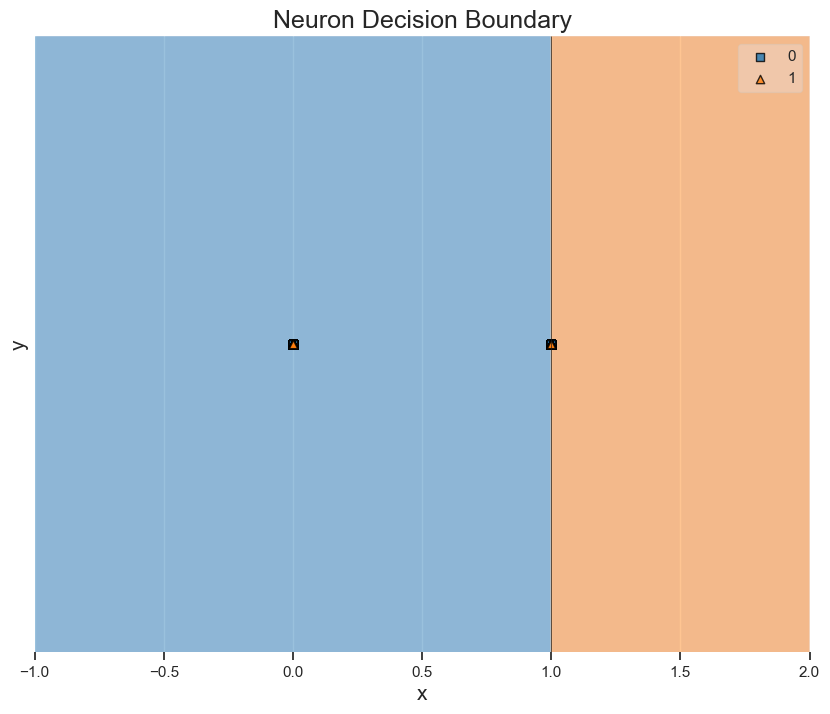

In [ ]:
model.plot_decision_boundary(X, y)
plt.show()